In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from ste import STE

In [2]:
# Set default setting for the figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../packages/")
from TsIP.TsIP import TsIP

# Time series dataset

In [4]:
# Define the country name.
COUNTRY = "Mali"

In [5]:
# Load the time series.
df = pd.read_csv(f"../Dataset time-series/output_data/{COUNTRY}/{COUNTRY}.csv", header = [0, 1], index_col = 0)
# Not consider some indicators.
df.drop(["Code", "Ramadan", "Population", "Area", "Lon", "Lat", "Waterways"], axis = 1, level = "Indicator", inplace = True)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq
df.head()

AdminStrata                        Bamako                                     \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%) FCG   
Datetime                                                                       
2018-01-01                            NaN                            NaN NaN   
2018-01-02                            NaN                            NaN NaN   
2018-01-03                            NaN                            NaN NaN   
2018-01-04                            NaN                            NaN NaN   
2018-01-05                            NaN                            NaN NaN   

AdminStrata                                                        \
Indicator   Fatalities NDVI NDVI Anomaly Price cereals and tubers   
Datetime                                                            
2018-01-01         NaN  NaN          NaN                      NaN   
2018-01-02         NaN  NaN          NaN                      NaN   
2018-01-03         NaN  NaN          NaN                      NaN   
2018-01-04         NaN  NaN          NaN                      NaN   
2018-01-05         NaN  NaN          NaN                      NaN   

AdminStrata                                             Kayes  ... Sikasso  \
Indicator   Rainfalls (mm) rCSI 1 Month Anomaly Rainfalls (%)  ...    rCSI   
Datetime                                                       ...           
2018-01-01             NaN  NaN                           NaN  ...     NaN   
2018-01-02             NaN  NaN                           NaN  ...     NaN   
2018-01-03             NaN  NaN                           NaN  ...     NaN   
2018-01-04             NaN  NaN                           NaN  ...     NaN   
2018-01-05             NaN  NaN                           NaN  ...     NaN   

AdminStrata           Tombouctou-Taoudeni                                     \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%) FCG   
Datetime                                                                       
2018-01-01                            NaN                            NaN NaN   
2018-01-02                            NaN                            NaN NaN   
2018-01-03                            NaN                            NaN NaN   
2018-01-04                            NaN                            NaN NaN   
2018-01-05                            NaN                            NaN NaN   

AdminStrata                                                        \
Indicator   Fatalities NDVI NDVI Anomaly Price cereals and tubers   
Datetime                                                            
2018-01-01         NaN  NaN          NaN                      NaN   
2018-01-02         NaN  NaN          NaN                      NaN   
2018-01-03         NaN  NaN          NaN                      NaN   
2018-01-04         NaN  NaN          NaN                      NaN   
2018-01-05         NaN  NaN          NaN                      NaN   

AdminStrata                      
Indicator   Rainfalls (mm) rCSI  
Datetime                         
2018-01-01             NaN  NaN  
2018-01-02             NaN  NaN  
2018-01-03             NaN  NaN  
2018-01-04             NaN  NaN  
2018-01-05             NaN  NaN  

[5 rows x 63 columns]

In [6]:
len(df)

1827

In [7]:
PROVINCES = df.columns.get_level_values("AdminStrata").unique()
PROVINCES

Index(['Bamako', 'Kayes', 'Koulikoro', 'Mopti', 'Segou', 'Sikasso',
       'Tombouctou-Taoudeni'],
      dtype='object', name='AdminStrata')

In [8]:
INDICATORS = df.columns.get_level_values("Indicator").unique()
INDICATORS

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'FCG', 'Fatalities', 'NDVI', 'NDVI Anomaly', 'Price cereals and tubers',
       'Rainfalls (mm)', 'rCSI'],
      dtype='object', name='Indicator')

In [9]:
INDICATORS_TO_CONSIDER = ["FCG", "Fatalities", "rCSI"] 

df = df.loc[:, df.columns.get_level_values("Indicator").isin(INDICATORS_TO_CONSIDER)]
df.dropna(inplace = True)
df.head()

AdminStrata    Bamako                            Kayes                        \
Indicator         FCG Fatalities       rCSI        FCG Fatalities       rCSI   
Datetime                                                                       
2019-10-20   7.821026        0.0  18.006548  16.672566        0.0  21.734513   
2019-10-21   7.821026        0.0  18.006548  16.672566        0.0  21.734513   
2019-10-22   7.821026        0.0  18.006548  16.672566        0.0  21.734513   
2019-10-23   7.821026        0.0  18.006548  16.672566        0.0  21.734513   
2019-10-24   7.821026        0.0  18.006548  16.672566        0.0  21.734513   

AdminStrata  Koulikoro                            Mopti  ...             \
Indicator          FCG Fatalities       rCSI        FCG  ...       rCSI   
Datetime                                                 ...              
2019-10-20   12.261682        0.0  18.130841  28.709842  ...  25.803162   
2019-10-21   12.261682        0.0  18.130841  28.755556  ...  27.422222   
2019-10-22   12.261682        0.0  18.130841  29.867601  ...  28.348910   
2019-10-23   12.261682        0.0  18.130841  30.633110  ...  26.740071   
2019-10-24   12.261682        0.0  18.130841  30.814873  ...  26.898734   

AdminStrata      Segou                          Sikasso                        \
Indicator          FCG Fatalities       rCSI        FCG Fatalities       rCSI   
Datetime                                                                        
2019-10-20   31.822726        0.0  14.561813  16.048938        0.0  18.783735   
2019-10-21   31.646763        0.0  15.619107  16.048938        0.0  18.783735   
2019-10-22   34.666667        0.0  15.875969  16.048938        0.0  18.783735   
2019-10-23   35.505618        0.0  16.051364  16.048938        0.0  18.783735   
2019-10-24   35.505618        0.0  16.051364  16.048938        0.0  18.783735   

AdminStrata Tombouctou-Taoudeni                        
Indicator                   FCG Fatalities       rCSI  
Datetime                                               
2019-10-20            19.694868        1.0  30.097087  
2019-10-21            25.144844        1.0  39.629200  
2019-10-22            23.510293        1.0  43.553629  
2019-10-23            24.544480        1.0  40.943194  
2019-10-24            24.232804        1.0  40.423280  

[5 rows x 21 columns]

In [10]:
# Plot time-series.
TsIP(df).interactive_plot_df(title = "Time-series", matplotlib = False, style = "lines", comparison = False, normalization = True)

interactive(children=(ToggleButtons(description='AdminStrata', options=('Bamako', 'Kayes', 'Koulikoro', 'Mopti…

## Compute the entropy rate

In [11]:
# Compute the entropy rate of the endogenous indicators (FCS indicator).
ks = 20

def compute_entropy_rate(serie):
    y = list()
    for k in range(ks):
        result = STE.entropy_rate(serie, m = 3, k = k+1, h = 1)
        y.append(result)  
    return y  

tqdm.pandas()
df_Y = df.xs("FCG", axis = 1, level = 1, drop_level = True).progress_apply(compute_entropy_rate)
df_Y.index = df_Y.index  + 1
df_Y.head()

AdminStrata,Bamako,Kayes,Koulikoro,Mopti,Segou,Sikasso,Tombouctou-Taoudeni
1,1.292245,1.303410,1.297796,1.455676,1.451788,1.274869,1.440097
2,1.265753,1.266052,1.278680,1.433028,1.423559,1.258036,1.424128
3,1.194326,1.203686,1.208928,1.375440,1.373150,1.207133,1.344288
4,1.044981,1.038112,1.035531,1.210136,1.210097,1.041809,1.177975
5,0.843879,0.792360,0.803122,0.889216,0.913935,0.806816,0.893288


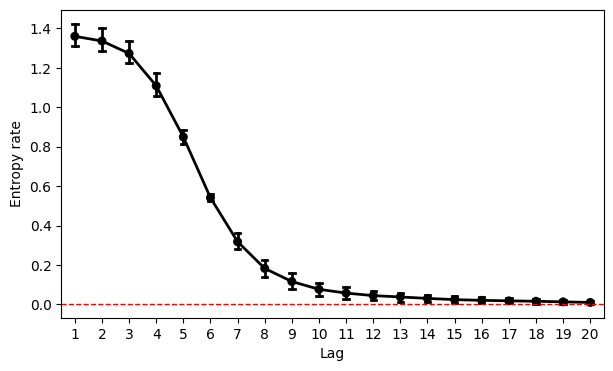

In [12]:
fig, ax = plt.subplots(figsize = (7, 4))
sns.set_context("notebook", font_scale = 1.2, rc = {"lines.linewidth": 1.1})
g = sns.pointplot(x = "index", y = "value", data = df_Y.melt(ignore_index = False).reset_index(),
                  color = "k", estimator = np.mean, capsize = .2, linewidth = 5.5, ax = ax)
plt.axhline(y = 0, ls = "--", color = "r", linewidth = 1)
ax.set_xlabel("Lag")
ax.set_ylabel("Entropy rate")

# Save the figure.
fig.savefig(f"./output/images/Entropy_rate_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

## Compute the STE

In [13]:
np.random.seed(42)

max_deltas = 20

def compute_STE(serie):
    adminstrata, indicator = serie.name
    x = serie.values.ravel().copy()
    y = df[adminstrata]["FCG"].values.ravel().copy()
    
    deltas = list()
    for delta in range(max_deltas):
        # Compute STE.
        original_STE = STE.calc_ste(x, y, m = 3, h = delta+1) 
        # Compute value of STE from X (shuffled 30 times) to Y.
        shuffle_STE = list()
        for i in range(30):
            x_shuffle = x.copy()
            np.random.shuffle(x_shuffle)
            shuffle_STE.append(STE.calc_ste(x_shuffle, y, m = 3, h = delta+1))  
        shuffle_STE = np.mean(shuffle_STE)
        # Compute effective STE.
        effective_STE = original_STE - shuffle_STE
        # Compute relative explanation added.
        REA = (original_STE - shuffle_STE) / STE.entropy_rate(y, m = 3, h = delta+1)
        # Append results.
        deltas.append([original_STE, shuffle_STE, effective_STE, REA])
        
    deltas = pd.DataFrame(deltas, columns = ["original_STE", "shuffle_STE", "effective_STE", "REA"]) 
    deltas.index = deltas.index + 1   
    deltas.index.name = "Delta"
    return deltas 

tqdm.pandas()
df_STE_deltas = df.groupby(axis = 1, level = ["AdminStrata", "Indicator"]).progress_apply(compute_STE)
df_STE_deltas.drop("FCG", axis = 1, level = "Indicator", inplace = True)
# Save results.
df_STE_deltas.to_csv(f"./output/STE_{COUNTRY}.csv")
df_STE_deltas.head()

AdminStrata       Bamako                                                   \
Indicator     Fatalities                                             rCSI   
            original_STE shuffle_STE effective_STE       REA original_STE   
Delta                                                                       
1               0.018427    0.052542     -0.034114 -0.026399     0.061678   
2               0.039541    0.126811     -0.087271 -0.039515     0.125228   
3               0.036299    0.129752     -0.093453 -0.041869     0.119157   
4               0.028102    0.131612     -0.103510 -0.046453     0.114278   
5               0.027255    0.128832     -0.101577 -0.045376     0.124100   

AdminStrata                                            Kayes              ...  \
Indicator                                         Fatalities              ...   
            shuffle_STE effective_STE       REA original_STE shuffle_STE  ...   
Delta                                                                     ...   
1              0.051901      0.009777  0.007566     0.018534    0.051846  ...   
2              0.133282     -0.008054 -0.003647     0.031998    0.131122  ...   
3              0.135784     -0.016627 -0.007449     0.030265    0.134555  ...   
4              0.134983     -0.020705 -0.009292     0.039463    0.139012  ...   
5              0.136027     -0.011927 -0.005328     0.043394    0.134601  ...   

AdminStrata       Sikasso           Tombouctou-Taoudeni              \
Indicator            rCSI                    Fatalities               
            effective_STE       REA        original_STE shuffle_STE   
Delta                                                                 
1                0.012843  0.010074            0.036835    0.050695   
2               -0.000486 -0.000223            0.073171    0.129791   
3               -0.007979 -0.003599            0.090548    0.139895   
4                0.015219  0.006862            0.094859    0.134714   
5                0.022387  0.010095            0.098585    0.138242   

AdminStrata                                                                 \
Indicator                                   rCSI                             
            effective_STE       REA original_STE shuffle_STE effective_STE   
Delta                                                                        
1               -0.013860 -0.009624     0.057614    0.049660      0.007954   
2               -0.056620 -0.023245     0.138947    0.134745      0.004203   
3               -0.049347 -0.020341     0.160648    0.134855      0.025793   
4               -0.039855 -0.016381     0.168284    0.136061      0.032223   
5               -0.039658 -0.016268     0.131009    0.132096     -0.001087   

AdminStrata            
Indicator              
                  REA  
Delta                  
1            0.005523  
2            0.001725  
3            0.010632  
4            0.013245  
5           -0.000446  

[5 rows x 56 columns]

In [14]:
df_STE_deltas = pd.read_csv(f"./output/STE_{COUNTRY}.csv", index_col = 0, header = [0, 1, 2])
df_STE_deltas.head()

AdminStrata       Bamako                                                   \
Indicator     Fatalities                                             rCSI   
            original_STE shuffle_STE effective_STE       REA original_STE   
Delta                                                                       
1               0.018427    0.052542     -0.034114 -0.026399     0.061678   
2               0.039541    0.126811     -0.087271 -0.039515     0.125228   
3               0.036299    0.129752     -0.093453 -0.041869     0.119157   
4               0.028102    0.131612     -0.103510 -0.046453     0.114278   
5               0.027255    0.128832     -0.101577 -0.045376     0.124100   

AdminStrata                                            Kayes              ...  \
Indicator                                         Fatalities              ...   
            shuffle_STE effective_STE       REA original_STE shuffle_STE  ...   
Delta                                                                     ...   
1              0.051901      0.009777  0.007566     0.018534    0.051846  ...   
2              0.133282     -0.008054 -0.003647     0.031998    0.131122  ...   
3              0.135784     -0.016627 -0.007449     0.030265    0.134555  ...   
4              0.134983     -0.020705 -0.009292     0.039463    0.139012  ...   
5              0.136027     -0.011927 -0.005328     0.043394    0.134601  ...   

AdminStrata       Sikasso           Tombouctou-Taoudeni              \
Indicator            rCSI                    Fatalities               
            effective_STE       REA        original_STE shuffle_STE   
Delta                                                                 
1                0.012843  0.010074            0.036835    0.050695   
2               -0.000486 -0.000223            0.073171    0.129791   
3               -0.007979 -0.003599            0.090548    0.139895   
4                0.015219  0.006862            0.094859    0.134714   
5                0.022387  0.010095            0.098585    0.138242   

AdminStrata                                                                 \
Indicator                                   rCSI                             
            effective_STE       REA original_STE shuffle_STE effective_STE   
Delta                                                                        
1               -0.013860 -0.009624     0.057614    0.049660      0.007954   
2               -0.056620 -0.023245     0.138947    0.134745      0.004203   
3               -0.049347 -0.020341     0.160648    0.134855      0.025793   
4               -0.039855 -0.016381     0.168284    0.136061      0.032223   
5               -0.039658 -0.016268     0.131009    0.132096     -0.001087   

AdminStrata            
Indicator              
                  REA  
Delta                  
1            0.005523  
2            0.001725  
3            0.010632  
4            0.013245  
5           -0.000446  

[5 rows x 56 columns]

In [15]:
def compute_importance(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax()
    return x.xs("REA", axis = 1, level = 2).loc[idx].values.ravel()[0]
    
T_fcs = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_importance).unstack("Indicator")

In [16]:
T_fcs_perc = T_fcs*100
T_fcs_perc[T_fcs_perc < 0] = 0

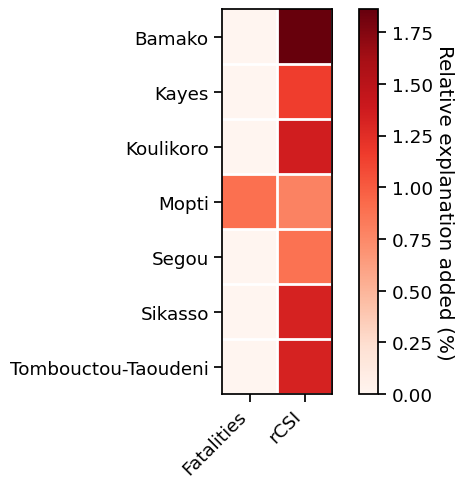

In [17]:
fig, ax = plt.subplots(figsize = (7, 5))
im = ax.imshow(T_fcs_perc, cmap = "Reds")
cbar = fig.colorbar(im, ax = ax)
cbar.set_label("Relative explanation added (%)", rotation = 270, labelpad = 15)

ax.set_xticks(range(len(T_fcs_perc.columns)))
ax.set_yticks(range(len(T_fcs_perc.index)))
ax.set_xticklabels(T_fcs.columns, rotation = 45)
ax.set_yticklabels(T_fcs.index)

for i in range(T_fcs_perc.shape[0]):
    ax.axhline(i + 0.5, color = "white", lw = 2)
for i in range(T_fcs_perc.shape[1]):
    ax.axvline(i + 0.5, color = "white", lw = 2)

plt.xticks(rotation = 45, ha = "right");

# Save the figure.
fig.savefig(f"./output/images/Importance_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

In [18]:
lags = df_STE_deltas.xs("REA", axis = 1, level = 2)

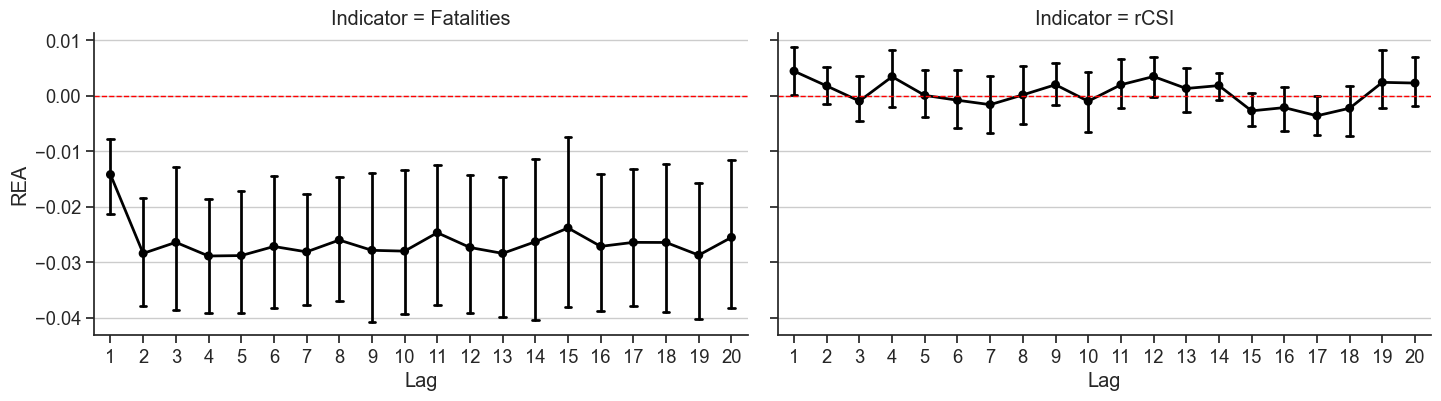

In [19]:
sns.set_style("ticks", {"axes.grid" : True})
sns.set_context("notebook", font_scale = 1.2, rc = {"lines.linewidth": 1.1})
g = sns.catplot(x = "Delta", y = "value", col = "Indicator",
                data = lags.melt(ignore_index = False).reset_index(), 
                kind = "point",
                color = "k",
                estimator = np.mean,
                capsize = .2,
                height = 4,
                aspect = 1.8,
                col_wrap = 2)
g.map(plt.axhline, y = 0, ls = "--", color = "r", linewidth = 1)
g.set_xlabels("Lag")
g.set_ylabels("REA")

# Save the figure.
g.savefig(f"./output/images/REA_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)